# Osyczka and Kundu function multi-objective optimization (min).
---
Description:

- Optimization (min)
- Multi-objective (2)
- Constraints (6)
---

Minimize the equations given by:

\begin{cases}
      f_{1}\left(\mathbf{x}\right) = -(25(x_1 - 2)^2 + (x_2 - 2)^2 + (x_3 - 1)^2 + (x_4 - 4)^2 + (x_5 - 1)^2), \\
      f_{2}\left(\mathbf{x}\right) = x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2 + x_6^2, \\
\end{cases}

subject to:

\begin{cases}
      C_{1}\left(\mathbf{x}\right) = (x_1 + x_2 − 2) \geq 0, \\
      C_{2}\left(\mathbf{x}\right) = (6 - x_1 − x_2) \geq 0, \\
      C_{3}\left(\mathbf{x}\right) = (2 - x_2 + x_1) \geq 0, \\
      C_{4}\left(\mathbf{x}\right) = (2 − x_1 + 3x_2) \geq 0, \\
      C_{5}\left(\mathbf{x}\right) = (4 − (x_3 − 3)^2 − x_4) \geq 0, \\
      C_{6}\left(\mathbf{x}\right) = ((x_5 − 3)^2 + x_6−4) \geq 0, \\
\end{cases}

where:

\begin{cases}
      0\le x_1, x_2, x_6 \le 10, \\
      1\le x_3, x_5 \le 5, \\
      0\le x_4 \le 6. \\
\end{cases}

The Pareto-optimal region is a concatenation of five regions. Every region lies on some of the constraints. However, for the entire Pareto-optimal region, $\hat{x}_4=\hat{x}_6=0$.

## First we import python libraries and set up the directory of our code.

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

## Here we import all our custom PSO code.

In [2]:
from star_pso.population.swarm import Swarm
from star_pso.population.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.utils.auxiliary import pareto_front, cost_function

## Define the multi-objective function

In [3]:
# Multi-objective function.
@cost_function(minimize=True)
def fun_OSY(vector_x: np.ndarray, **kwargs) -> float:
    
    # Set the penalty coefficient.
    rho = 10.0
    
    # Extract the gene values.
    x1, x2, x3, x4, x5, x6 = vector_x
    
    # Compute 1st objective function.
    f1 = -(25.0*(x1 - 2.0)**2 +
                (x2 - 2.0)**2 +
                (x3 - 1.0)**2 +
                (x4 - 4.0)**2 +
                (x5 - 1.0)**2)
    
    # Compute 2nd objective function.
    f2 = np.sum(vector_x**2)
    
    # Compute the constraints.
    C1 = min(0.0, (x1 + x2 - 2.0))**2
    C2 = min(0.0, (6.0 - x1 - x2))**2
    C3 = min(0.0, (2.0 + x1 - x2))**2
    C4 = min(0.0, (2.0 - x1 + 3.0*x2))**2
    C5 = min(0.0, (4.0 - (x3 - 3.0)**2 - x4))**2
    C6 = min(0.0, ((x5 - 3.0)**2 + x6 - 4.0))**2

    # Assign the weights.
    w1 = (kwargs["it"] % 100) / 99
    w2 = 1.0 - w1
 
    # Compute the final value.
    f_value = w1*f1 + w2*f2 + rho*(C1 + C2 + C3 + C4 + C5 + C6)
    
    # Return the solution.
    return f_value
# _end_def_

## Here we set the PSO parameters

- Set the number of particles 'N'
- Setup the initial population
- Create the PSO object

In [4]:
# Random number generator.
rng = np.random.default_rng()

# Define the number of particles.
N = 50

# Draw random samples for the initial points.
x1_0 = rng.uniform(0.0, 10.0, size=N)
x2_0 = rng.uniform(0.0, 10.0, size=N)
x3_0 = rng.uniform(1.0,  5.0, size=N)
x4_0 = rng.uniform(0.0,  6.0, size=N)
x5_0 = rng.uniform(1.0,  5.0, size=N)
x6_0 = rng.uniform(0.0, 10.0, size=N)

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in zip(x1_0, x2_0,
                                           x3_0, x4_0,
                                           x5_0, x6_0)])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm = swarm_t0, obj_func = fun_OSY,
                       x_min = (0.0,   0.0, 1.0, 0.0, 1.0,  0.0),
                       x_max = (10.0, 10.0, 5.0, 6.0, 5.0, 10.0))

### Optimization process.

In [5]:
test_PSO.run(max_it = 500,
             options = {"w0": 0.85, "c1": 1.65, "c2": 1.65, "mode": "fipso"},
             reset_swarm = True, verbose = True, adapt_params = False)

Initial f_optimal = -58.4306
Iteration:     1 -> f_optimal = -75.3500
Iteration:    51 -> f_optimal = 55.7142
Iteration:   101 -> f_optimal = -5.6596
Iteration:   151 -> f_optimal = 55.7141
Iteration:   201 -> f_optimal = -5.6365
Iteration:   251 -> f_optimal = 55.7103
Iteration:   301 -> f_optimal = -5.6365
Iteration:   351 -> f_optimal = 55.7140
Iteration:   401 -> f_optimal = -5.6401
Iteration:   451 -> f_optimal = 55.7133
Final f_optimal = 116.0000
run: elapsed time = 0.679 seconds.


In [6]:
# Get the optimal solution from the PSO.
i_opt, _, x_opt = test_PSO.get_optimal_values()

# Compute objective function 1.
f1_opt = -(25.0*(x_opt[0] - 2.0)**2 +
                (x_opt[1] - 2.0)**2 +
                (x_opt[2] - 1.0)**2 +
                (x_opt[3] - 4.0)**2 +
                (x_opt[4] - 1.0)**2)

# Compute objective function 2.
f2_opt = np.sum(x_opt**2)

print(f"At iteration {i_opt}")
print(" ")

for i, xi in enumerate(x_opt, start=1):
    print(f"x{i}={xi:.5f}")

print(" ")
print(f"f1(x) = {f1_opt:.5f}")
print(f"f2(x) = {f2_opt:.5f}")

At iteration 200
 
x1=0.00000
x2=2.00129
x3=1.00000
x4=0.00000
x5=1.00000
x6=0.00000
 
f1(x) = -116.00000
f2(x) = 6.00518


In [7]:
best_n = []

for p in test_PSO.swarm.best_n(n=25):
    
    # Extract the gene values.
    x1, x2, x3, x4, x5, _ = p.position
        
    # Compute objective function 1.
    f1 = -(25.0*(x1 - 2.0)**2 +
                (x2 - 2.0)**2 +
                (x3 - 1.0)**2 +
                (x4 - 4.0)**2 +
                (x5 - 1.0)**2)
    
    # Compute objective function 2.
    f2 = np.sum(p.position**2)

    # Append both values in the list.
    best_n.append((f1, f2))
    
# Convert to numpy.
best_n = np.array(best_n)

# Display the number of unique points.
print("Number of unique points: ", len(np.unique(best_n, axis=0)))

Number of unique points:  25


### Compute the Pareto Frontier (solutions).

In [8]:
# Create a list that will hold points that satisfy both constraints.
points = []

L = 30

x4 = x6 = 0.0

# Test some grid points.
for x1 in np.linspace(0.0, 10.0, L):
    
    for x2 in np.linspace(0.0, 10.0, L):

        # Compute the constraints.
        C1 = (x1 + x2 - 2.0) >= 0.0
        C2 = (6.0 - x1 - x2) >= 0.0
        C3 = (2.0 - x2 + x1) >= 0.0
        C4 = (2.0 - x1 + 3.0*x2) >= 0.0

        if all([C1, C2, C3, C4]):
        
            for x3 in np.linspace(1.0, 5.0, L):
               
                for x5 in np.linspace(1.0, 5.0, L):
                
                    # Compute the constraints.
                    C5 = (4.0 - (x3 - 3.0)**2 - x4) >= 0.0
                    C6 = ((x5 - 3.0)**2 + x6 - 4.0) >= 0.0
                    
                    # If all constraints are satisfied.
                    if all([C5, C6]):
                        
                        # Evaluate both functions.
                        f1 = -(25.0*(x1 - 2.0)**2 +
                                    (x2 - 2.0)**2 +
                                    (x3 - 1.0)**2 +
                                    (x4 - 4.0)**2 + 
                                    (x5 - 1.0)**2)
                        
                        # Evaluate both functions.
                        f2 = x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2
    
                        # Keep the point in the list.
                        points.append((f1, f2))
                    # _end_if_
# _end_for_

# Convert list to numpy.
points = np.array(points)

# Estimate the pareto front points.
pareto_points = pareto_front(points)

### Visualize the solution on the Pareto plot.

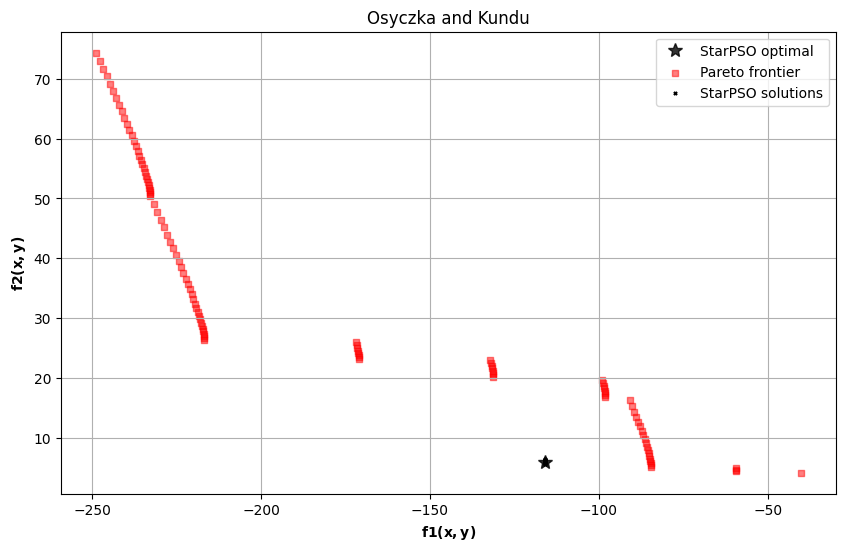

In [9]:
# Create a new figure.
plt.figure(figsize=(10, 6))

# Plot the optimal solution from the PSO.
plt.plot(f1_opt, f2_opt,
         'k*', markersize=10, alpha=0.8, label="StarPSO optimal")

# Plot the Pareto front.
plt.scatter(x=pareto_points[:, 0],
            y=pareto_points[:, 1],
            s=20, marker='s', color='red', alpha=0.5, label="Pareto frontier")

# Plot all the rest of solutions.
plt.scatter(x=best_n[:, 0],
            y=best_n[:, 1],
            s=5, marker='x', color="black", label="StarPSO solutions")

# Tidy up the plot.
plt.title("Osyczka and Kundu")
plt.xlabel(r"$\mathbf{f1(x,y)}$")
plt.ylabel(r"$\mathbf{f2(x,y)}$")
plt.legend()
plt.grid(True)

plt.savefig("Osyczka_and_Kundu_optimal.pdf", format="pdf", dpi=300)

### End of file